In [7]:
from IPython.display import HTML
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, Image

# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import collections
import datetime
import numpy as np
import pickle
import util
from multiprocessing import Process
import sys
import RPi.GPIO as GPIO
GPIO.setwarnings(False)

from util import *

proc = None

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [10]:
temp_ini()
wireless_ini()
temps = collections.deque(maxlen=24,)
message_log = collections.deque(maxlen=24)

def radiator_controller(temp_lower, time_finish, interval_load):
    while True:
        file_log = open('log.txt','w')
        t = datetime.datetime.now().time()
        curr = read_temp()
        temps.append((t, curr))
        if (curr <= temp_lower) & (t.hour < time_finish):
            message = '%d:%d:%d Temp: %.3f, turning on the radiator'%(t.hour, t.minute,t.second, curr)
            message_log.appendleft(message)
            wireless_one()
#             print('trigger ', curr, time_finish, t.hour)
            sys.stdout.write("%s  \r" % (message) )
            sys.stdout.flush()

        elif (curr > (temp_lower+0.5)) or (t.hour > time_finish):
            message = '%d:%d:%d Temp: %.3f, turning OFF radiator'%(t.hour, t.minute, t.second,curr)
            message_log.appendleft(message)
            wireless_one_off()
#             print('OFF ', curr, time_finish, t.hour)
            sys.stdout.write("%s  \r" % (message) )
            sys.stdout.flush()

        else:
            message = '%d:%d:%d Temp:%.3f '%(t.hour, t.minute,t.second, curr)
            message_log.appendleft(message)
            sys.stdout.write("%s  \r" % (message) )
            sys.stdout.flush()

        file_log = open('log.txt','w')
        file_log.write("\n <br />".join(message_log))
        file_log.close()
        plt.plot([i[1] for i in temps])
        plt.savefig('graph.png')
        plt.close()
        plt.show()
        
        time.sleep(interval_load)

In [58]:
def time_return(time):
    return time
def temp_return(temp):
    return temp
def interval_return(interval):
    return interval
end_temp = interact(temp_return, temp=widgets.FloatSlider(min=12,max=20,step=0.5,value=16));
end_time = interact(time_return, time=widgets.FloatSlider(min=0,max=24,step=1,value=8));
end_interval = interact(interval_return, interval=widgets.FloatSlider(min=5,max=1200,step=1,value=600));

interactive(children=(FloatSlider(value=16.0, description='temp', max=20.0, min=12.0, step=0.5), Output()), _d…

interactive(children=(FloatSlider(value=8.0, description='time', max=24.0, step=1.0), Output()), _dom_classes=…

interactive(children=(FloatSlider(value=600.0, description='interval', max=1200.0, min=5.0, step=1.0), Output(…

In [59]:
temp = end_temp.widget.kwargs['temp']
time_load = end_time.widget.kwargs['time']
interval_load = end_interval.widget.kwargs['interval']
print('Maintaining temp: ',temp)
print('Will do this for hour less than:', time_load)
print('will check every:', interval_load)

Maintaining temp:  16.5
Will do this for hour less than: 8.0
will check every: 600.0


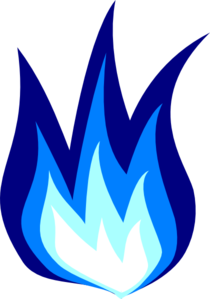

In [60]:
display(Image(filename='blue-fire-md.png'))
proc = Process(target=radiator_controller, args=(temp,time_load, interval_load))
proc.start()

In [15]:
off_button = widgets.Button(description = 'Turn Off Radiator')
display(off_button)
def off_button_clicked(b):
    print('Off Button Clicked, turning off heater')
    util.wireless_one_off()
    if proc is not None:
        if proc.is_alive():
            print('its killing time')
            proc.terminate()

off_button.on_click(off_button_clicked)
##########################################################
on_button = widgets.Button(description = 'Turn On Radiator')
display(on_button)
def on_button_clicked(b):

    print('On Button Clicked, turning On heater')
    util.wireless_one()

on_button.on_click(on_button_clicked)

##########################################################
##########################################################

##########################################################
control_off_button = widgets.Button(description = 'controller OFF')
display(control_off_button)
def control_off_button_clicked(b):
    print('Control Off Button Clicked, turning off heater control')
    util.wireless_one_off()
    if proc is not None:
        if proc.is_alive():
            print('its killing time')
            proc.terminate()

control_off_button.on_click(control_off_button_clicked)

Button(description='Turn Off Radiator', style=ButtonStyle())

Button(description='Turn On Radiator', style=ButtonStyle())

Button(description='controller OFF', style=ButtonStyle())

On Button Clicked, turning On heater
Control Off Button Clicked, turning off heater control
On Button Clicked, turning On heater
On Button Clicked, turning On heater
Off Button Clicked, turning off heater
its killing time
Control Off Button Clicked, turning off heater control
Control Off Button Clicked, turning off heater control
its killing time
Control Off Button Clicked, turning off heater control
Control Off Button Clicked, turning off heater control
Control Off Button Clicked, turning off heater control
Control Off Button Clicked, turning off heater control
Control Off Button Clicked, turning off heater control
its killing time
Control Off Button Clicked, turning off heater control
its killing time
On Button Clicked, turning On heater


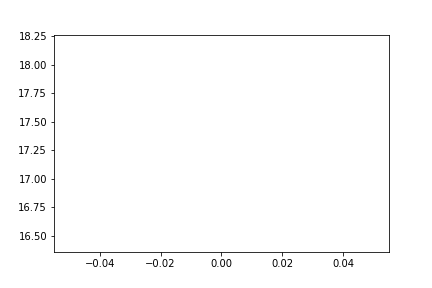

In [23]:
try:
    display(Image(filename='graph.png') )
except:
    print('try again')

In [47]:
f = open('log.txt','r')
for i in f:
    print(i)
f.close()

23:19:33 Temp: 17.812, turning OFF radiator

 <br />23:9:30 Temp: 17.562, turning OFF radiator

 <br />22:59:28 Temp: 17.437, turning OFF radiator

 <br />22:49:25 Temp: 17.500, turning OFF radiator

 <br />22:39:22 Temp: 17.500, turning OFF radiator

 <br />22:29:20 Temp: 17.562, turning OFF radiator


In [48]:
proc.is_alive()

True

In [50]:
proc.ident

14862

In [51]:
proc.pid

14862

In [52]:
proc.terminate()

In [10]:
# proc.terminate()

In [3]:
# radiator_controller(temp_lower=15, time_finish=8)

In [87]:
# def f(a, b):
#     display(a + b)
#     return a+b

# global w
# w = interactive(f, a=10, b=20)
# display(w)

In [8]:
# def printer():
#     while True:
#         print(w.kwargs.values())
#         time.sleep(1)
# # printer()

In [10]:
# import threading
# t = threading.Thread(target = printer)

In [7]:
# def test_func():
#     while True:
# #         print(time.time())
# #         print('%f \r'%time.time(), end = '')
#         sys.stdout.write("time: %f  \r" % (time.time()) )
#         sys.stdout.flush()
#         time.sleep(1)

# # test_func()

In [23]:
# def runner():
#     proc = Process(target = test_func)
#     proc.start()
#     return proc
# p = runner()

In [15]:
# # global proc
# global proc_list
# proc_list = []

# on_button_control = widgets.Button(description = 'controller ON')
# display(on_button_control)
# def on_button_control_clicked(b):
#     print('Control On Button Clicked, turning On heater Control')
# #     proc = Process(target = radiator_controller(temp_lower=15, time_finish=8))
#     proc = Process(target = test_func)
#     proc_list.append(proc)
# #     proc.start()
#     print('process started')
# #     return proc

# on_button_control.on_click(on_button_control_clicked)





In [16]:
# control_off = False
# radiator_controller(temp_lower=15, time_finish=8)

In [6]:
# temp_required = interact(x = 15)

In [17]:
# import sys
# print(sys.executable)
# print(sys.version)

In [2]:
# import base64

In [3]:
# import collections
# d = collections.deque(maxlen=10)

In [18]:
# plt.plot([0,0,0,0])

In [19]:
# import matplotlib.pyplot as plt 
# import os
# os.getcwd()

In [23]:
import RPi.GPIO as GPIO
import time
import os
import datetime
import numpy as np
# import seaborn as sns
import pickle
# GPIO.setwarnings(False)

In [24]:
# !pip install seaborn

In [25]:
# !sudo dtoverlay w1-gpio gpiopin=6 pullup=0 # header pin 7

In [26]:
def wireless_ini():
#     GPIO.cleanup()
    # set the pins numbering mode
    GPIO.setmode(GPIO.BOARD)
    # Select the GPIO pins used for the encoder K0-K3 data inputs
    GPIO.setup(11, GPIO.OUT)
    GPIO.setup(15, GPIO.OUT)
    GPIO.setup(16, GPIO.OUT)
    GPIO.setup(13, GPIO.OUT)
    # Select the signal used to select ASK/FSK
    GPIO.setup(18, GPIO.OUT)
    # Select the signal used to enable/disable the modulator
    GPIO.setup(22, GPIO.OUT)
    # Disable the modulator by setting CE pin lo
    GPIO.output (22, False)
    # Set the modulator to ASK for On Off Keying
    # by setting MODSEL pin lo
    GPIO.output (18, False)
    # Initialise K0-K3 inputs of the encoder to 0000
    GPIO.output (11, False)
    GPIO.output (15, False)
    GPIO.output (16, False)
    GPIO.output (13, False)
    
def wireless_one():
    print('turning on radiator')
    GPIO.output (11, True)
    GPIO.output (15, True)
    GPIO.output (16, True)
    GPIO.output (13, True)
    # let it settle, encoder requires this
    time.sleep(0.1)
    # Enable the modulator
    GPIO.output (22, True)
    # keep enabled for a period
    time.sleep(0.25)
    # Disable the modulator
    GPIO.output (22, False)
#     GPIO.cleanup()

In [27]:
def wireless_one_off():
    print ("sending code 0111 Socket 1 off")
    GPIO.output (11, True)
    GPIO.output (15, True)
    GPIO.output (16, True)
    GPIO.output (13, False)
    # let it settle, encoder requires this
    time.sleep(0.1)
    # Enable the modulator
    GPIO.output (22, True)
    # keep enabled for a period
    time.sleep(0.25)
    # Disable the modulator
    GPIO.output (22, False)
#     GPIO.cleanup()

In [56]:
# wireless_ini()
wireless_one()


turning on radiator


In [32]:
temp_loc = '/sys/bus/w1/devices/'
device = '28-0213924576ef/'

In [51]:
def temp_ini():
    GPIO.cleanup()
    GPIO.setmode(GPIO.BOARD)
    GPIO.setup(40, GPIO.OUT) #21 BCM
    GPIO.output(40,1)

    os.system('modprobe w1-gpio')
    os.system('modprobe w1-therm')

#     temp_loc = '/sys/bus/w1/devices/'
    #########
#     os.chdir(temp_loc)
#     print(os.listdir())
##############
#     device = '28-0213924576ef/'
#     os.chdir(temp_loc+device)
#     print(os.getcwd())
    
temp_ini()    

In [52]:
def temp_raw():
    temp_sensor = temp_loc+device+'w1_slave'
    f=open(temp_sensor,'r')
    lines = f.readlines()
    f.close()
    return lines

def read_temp():
#     temp_ini()
    lines=temp_raw()
    while lines[0].strip()[-3:]!='YES':
        time.sleep(0.1)
        try:
            lines = temp_raw()
        except:
            print('temp read fail')
    temp_output = lines[1].find('t=')
    if temp_output != -1:
        temp_string = lines[1].strip()[temp_output+2:]
        temp_c = float(temp_string)/1000.0
        return temp_c
    

In [21]:
# temp_ini()
# read_temp()

In [22]:
# temps = []
# trigger_block = False
# block_time = datetime.datetime.now().time() #ini
# t = datetime.datetime.now().time()
# print('entering loop')
# while True:
#     t = datetime.datetime.now().time()
#     curr = read_temp()
#     print(t, curr)
#     temps = temps + [(t,curr)]
    
#     if (curr <= 17.0)  & (t.hour < 9) & (trigger_block == False):
#         trigger_block = True  
#         wireless_ini()
#         wireless_one()
#     elif (curr>17.5)& (trigger_block == True):
#         wireless_ini()
#         wireless_one_off()
#         trigger_block = False
    
#     time.sleep(60)

In [27]:
temps = []

In [29]:
temps = temps + [1]

In [67]:
import matplotlib.pyplot as plt 

In [116]:
te = [i[1] for i in temps]

In [72]:
ti = [i[0] for i in temps]

In [76]:
import matplotlib.dates as dates

In [92]:
my_day = datetime.date(2019, 1, 5)
x_dt = [ dates.date2num(datetime.datetime.combine(my_day, t)) for t in ti ]

In [23]:
# plt.plot(te)
# plt.annotate('17.0 heater activation',xy = (120,17), xytext = (100, 16.8),arrowprops=dict(facecolor='black', shrink=0.05))
# plt.annotate('17.5 heater cutt-off',xy = (370,17.5), xytext = (400, 17.65),arrowprops=dict(facecolor='black', shrink=0.05))
# plt.annotate('9am heater cutt-off',xy = (448,17.0), xytext = (350, 16.65),arrowprops=dict(facecolor='black', shrink=0.05))
# plt.xlim(0,600)
# plt.show()

In [24]:
# plt.plot(x_dt, te)
# plt.gcf().autofmt_xdate()
# plt.show()

In [25]:
# !sudo touch 190104to05temp_data.pkl

# pickle.dump(temps,open('190104to05temp_data.pkl', 'wb'))

In [6]:
from flask import Flask
from flask_ask import Ask, statement, convert_errors
import RPi.GPIO as GPIO
import logging
import serial
import time

In [26]:
# app = Flask(__name__)

# ask = Ask(app, '/')

# logging.getLogger("flask_ask").setLevel(logging.DEBUG)

# @ask.intent('temperature')

# def temperature():
#     x = 20
# #   x = 'The temperature is %d'%read_temp()

#     return statement(x)


# app.run(host='0.0.0.0', port=8080, debug=True)

In [48]:
def web_page(im_tag): 
    page= """

    <html>
    <head>
    <style>
    body {
            color: red;
    }
    </style>
    <body bgcolor="#000000">
        <head>
            <title>Temperature Plot</title>
        </head>
        <body>
            <h1>"""+ str_format()+""" </h1> 
            """ + im_tag + """
            
        </body>
    </html>


    """
    return page

In [49]:
def str_format():
    t = datetime.datetime.now().time()
    return "The time is %d:%d and the temperature is...  %d degrees"%(t.hour, t.minute, read_temp())

In [50]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
    data_uri = base64.b64encode(open('graph.png', 'rb').read()).decode('utf-8').replace('\n', '')
    img_tag = '<img src="data:image/png;base64,{0}">'.format(data_uri)
    return web_page(img_tag) #str_format()

app.run(host='0.0.0.0', port=8080)

 * Running on http://0.0.0.0:8080/ (Press CTRL+C to quit)
192.168.1.24 - - [27/Jan/2019 23:51:13] "GET / HTTP/1.1" 200 -


In [27]:
# plt.plot([1,2,3], [2,3,3])
# plt.savefig('graph.png')

In [7]:
exposed_page = """
<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {
        "762b489fb1574f1dac36ebb17cbd7ef6": {
            "model_name": "LayoutModel",
            "model_module": "@jupyter-widgets/base",
            "model_module_version": "1.1.0",
            "state": {}
        },
        "413580ba7d2649ba9520725ded2d7b8a": {
            "model_name": "ButtonStyleModel",
            "model_module": "@jupyter-widgets/controls",
            "model_module_version": "1.4.0",
            "state": {}
        },
        "cff2c1b5d4ee490eae5e4fa758345d22": {
            "model_name": "ButtonModel",
            "model_module": "@jupyter-widgets/controls",
            "model_module_version": "1.4.0",
            "state": {
                "style": "IPY_MODEL_413580ba7d2649ba9520725ded2d7b8a",
                "description": "Off",
                "layout": "IPY_MODEL_762b489fb1574f1dac36ebb17cbd7ef6"
            }
        },
        "29c4bc6d5328415881125d2a4815eae6": {
            "model_name": "LayoutModel",
            "model_module": "@jupyter-widgets/base",
            "model_module_version": "1.1.0",
            "state": {}
        },
        "271431dd902742a288396c08c5b5108b": {
            "model_name": "ButtonStyleModel",
            "model_module": "@jupyter-widgets/controls",
            "model_module_version": "1.4.0",
            "state": {}
        },
        "c0e3eb3812114a25b7260182b618ee18": {
            "model_name": "ButtonModel",
            "model_module": "@jupyter-widgets/controls",
            "model_module_version": "1.4.0",
            "state": {
                "style": "IPY_MODEL_271431dd902742a288396c08c5b5108b",
                "description": "On",
                "layout": "IPY_MODEL_29c4bc6d5328415881125d2a4815eae6"
            }
        }
    }
}
</script>
</head>
<body>

<script type="application/vnd.jupyter.widget-view+json">
{
    "version_major": 2,
    "version_minor": 0,
    "model_id": "cff2c1b5d4ee490eae5e4fa758345d22"
}
</script>

<script type="application/vnd.jupyter.widget-view+json">
{
    "version_major": 2,
    "version_minor": 0,
    "model_id": "c0e3eb3812114a25b7260182b618ee18"
}
</script>

</body>
</html>
"""

In [28]:
# from flask import Flask
# app = Flask(__name__)

# @app.route('/')
# def hello_world():

#     return exposed_page

# app.run(host='0.0.0.0', port=8070)